In [1]:
import numpy as np
import scipy.optimize
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
# load in the data
data = pd.read_csv("../../data/competition_experiments/plate_reader_data/20200217_growth_test_wt_v_delta.csv",
                   comment='#', header=1)

In [18]:
data.dropna(inplace = True)

In [21]:
# convert time to minutes
data['Time'] = np.linspace(0, 1380, 93)

# trim data above 800 to remove effects due to evaporation
data_trimmed = data[data['Time'] < 1200]
data_trimmed = data
data_trimmed.tail()

,Time,Temp Read 2:600,B2,B3,B4,B5,B6,B7,B8,B9,...,F8,F9,G2,G3,G4,G5,G6,G7,G8,G9
88,1320.0,37.1,0.134,0.226,0.222,0.031,0.187,0.04,0.187,0.031,...,0.172,0.03,0.130,0.181,0.138,0.03,0.168,0.039,0.149,0.03
89,1335.0,37.1,0.132,0.221,0.223,0.031,0.186,0.04,0.188,0.030,...,0.173,0.03,0.131,0.175,0.133,0.03,0.165,0.039,0.147,0.03
90,1350.0,37.1,0.131,0.215,0.222,0.031,0.185,0.04,0.188,0.030,...,0.174,0.03,0.133,0.169,0.135,0.03,0.166,0.039,0.146,0.03
91,1365.0,37.0,0.129,0.209,0.220,0.031,0.185,0.04,0.188,0.031,...,0.176,0.03,0.128,0.164,0.135,0.03,0.166,0.039,0.146,0.03
92,1380.0,37.0,0.128,0.203,0.216,0.031,0.185,0.04,0.189,0.030,...,0.175,0.03,0.126,0.156,0.134,0.03,0.164,0.038,0.143,0.03


In [22]:
# create a list of names of replicates for each condition.
wt_gly = ["B2", "C2", "D2", "E2", "F2", "G2"]
wt_lac = ["B3", "C3", "D3", "E3", "F3", "G3"]
wt_both = ["B4", "C4", "D4", "E4", "F4", "G4"]
delta_gly = ["B6", "C6", "D6", "E6", "F6", "G6"]
delta_lac = ["B7", "C7", "D7", "E7", "F7", "G7"]
# D9 was plated instead of D8 because water was accidentally added into D8
delta_both = ["B8", "C8", "D9", "E8", "F8", "G8"]

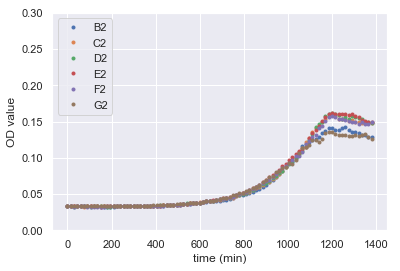

In [23]:
# plot each condition to see variability

# plot all variants of wt_gly
for well in wt_gly:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()

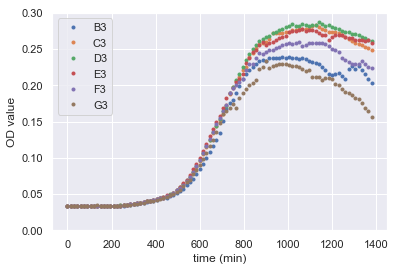

In [24]:
# plot all variants of st_lac
for well in wt_lac:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

    
plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()

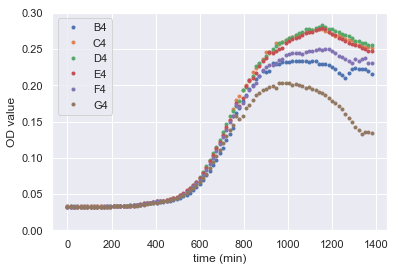

In [25]:
# plot all variants of wt_both
for well in wt_both:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()

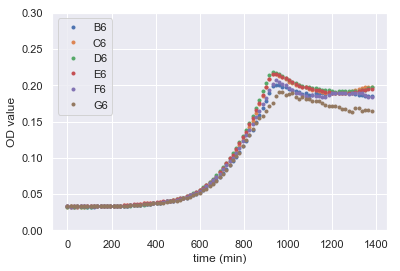

In [26]:
# plot all variants of delta_gly
for well in delta_gly:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()

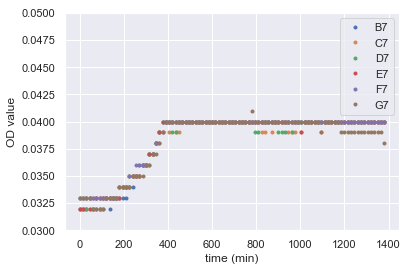

In [34]:
# plot all variants of delta_lac
for well in delta_lac:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0.03,0.05])
plt.legend()

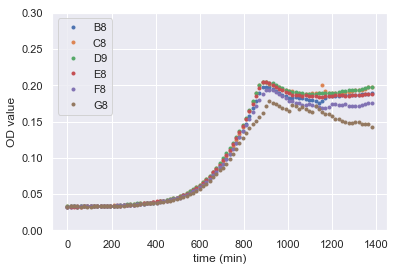

In [28]:
# plot all variants of delta_both
for well in delta_both:
    plt.plot(data_trimmed['Time'], data_trimmed[well], '.', label=well)

plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()

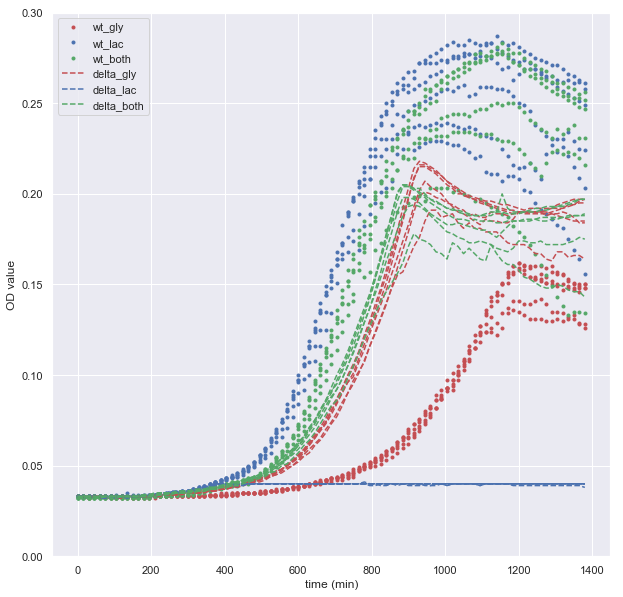

In [29]:
# loop through to plot conditions on top of each other to compare growth differences
conditions = [wt_gly, wt_lac, wt_both, delta_gly, delta_lac, delta_both]
condition_names = ['wt_gly', 'wt_lac', 'wt_both', 'delta_gly', 'delta_lac', 'delta_both']

# creat an array to loop through colors
colors = ['.r', '.b', '.g', '--r', '--b', '--g']

plt.figure(figsize=(10,10))

for color, condition, condition_name in zip(colors, conditions, condition_names):
    
    
    for i, well in enumerate(condition):
    
        if i == 0:
            
            plt.plot(data_trimmed['Time'], data_trimmed[well], color, label=condition_name)
        
        else:
            plt.plot(data_trimmed['Time'], data_trimmed[well], color, label='')
        
plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()
plt.show()

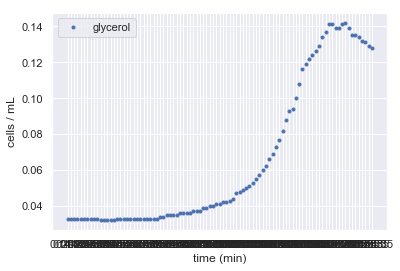

In [72]:
# plot
times = data["Time"]
N_wildtype_gly = data["B2"]
N_wildtype_both = data["B4"]

plt.plot(times, N_wildtype_gly, '.')
#plt.plot(times, N_wildtype_lac, '.')
plt.xlabel("time (min)")
plt.ylabel("cells / mL")
plt.legend(["glycerol", "lactose"])

Next, we will fit the curves to find a growth rate.

In [30]:
def exp_growth(times, N_0, r, t_thresh):
    """ exponential growth with time points t, initial population size N_0, 
    and growth rate r """
    
    N = np.zeros(len(times))
    
    for i, t in enumerate(times):
        if t < t_thresh:
            N[i] = N_0
            
        else:
            N[i] = N_0 * np.exp((t-t_thresh)*r)
            
    return N

In [25]:
exp_growth(times, 1000, 0.005, 200)

array([  1000.        ,   1000.        ,   1000.        ,   1000.        ,
         1000.        ,   1000.        ,   1000.        ,   1000.        ,
         1000.        ,   1000.        ,   1000.        ,   1000.        ,
         1000.        ,   1046.02785991,   1127.49685158,   1215.31098649,
         1309.96445073,   1411.98991967,   1521.96155562,   1640.49823906,
         1768.26705143,   1905.98702927,   2054.43321064,   2214.4409968 ,
         2386.91085352,   2572.81337859,   2773.19476396,   2989.18268339,
         3221.99263853,   3472.93479934,   3743.42137726,   4034.97457263,
         4349.23514106,   4687.97162702,   5053.09031656,   5446.64596521,
         5870.85336138,   6328.0997904 ,   6820.95846929,   7352.20302789,
         7924.82311785,   8542.04123729,   9207.33086588,   9924.43601229,
        10697.39228411,  11530.54959884,  12428.59666358,  13396.58736141,
        14439.9691928 ,  15564.61393218,  16776.85067214,  18083.50144126,
        19491.91959603,  

In [36]:
# optimize growth curve
# bounds on N_O: 10 to 1000
# bound on r: 0.0001 to 0.01 (per min)
popt_wt_gly, pcov_wt_gly = scipy.optimize.curve_fit(exp_growth, times, N_wildtype_gly, 
                                      bounds=([10, 0.0001, 0], [1000, 0.01, 700]))

popt_wt_lac, pcov_wt_lac = scipy.optimize.curve_fit(exp_growth, times, N_wildtype_lac, 
                                      bounds=([10, 0.0001, 0], [1000, 0.01, 700]))

Text(0, 0.5, 'cells / mL')

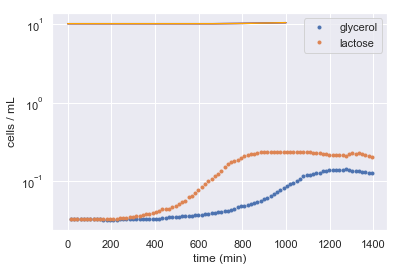

In [37]:
# plot data 
plt.semilogy(times, N_wildtype_gly, '.')
plt.semilogy(times, N_wildtype_lac, '.')
plt.legend(["glycerol", "lactose"])

time_range = np.linspace(0, 1000, 10)

# plot fits
plt.semilogy(time_range, exp_growth(time_range, *popt_wt_gly), color="blue")
plt.semilogy(time_range, exp_growth(time_range, *popt_wt_lac), color="orange")
plt.xlabel("time (min)")
plt.ylabel("cells / mL")